# Estruturando as tabelas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine, inspect, text

In [2]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [3]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [4]:
engine = create_engine('sqlite:///:memory:')

In [5]:
itens_pedidos.to_sql('itens_pedidos', engine, index=False)
pedidos.to_sql('pedidos', engine, index=False)
produtos.to_sql('produtos', engine, index=False)
vendedores.to_sql('vendedores', engine, index=False)

5

In [6]:
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


# Primeiras consultas

In [7]:
query = 'SELECT CONDICAO FROM produtos'

In [8]:
with engine.connect() as connection:
    result = connection.execute(text(query))
    resultado = result.fetchall()
pd.DataFrame(resultado, columns=result.keys())

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [9]:
def consulta(query):
    with engine.connect() as connection:
        resultado = connection.execute(text(query))
        dados = resultado.fetchall()
    return pd.DataFrame(dados, columns=resultado.keys())

In [10]:
query = 'SELECT CONDICAO, COUNT(*) AS Quantidade FROM produtos GROUP BY CONDICAO'

In [11]:
df_produtos = consulta(query)
df_produtos

,Condicao,Quantidade
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


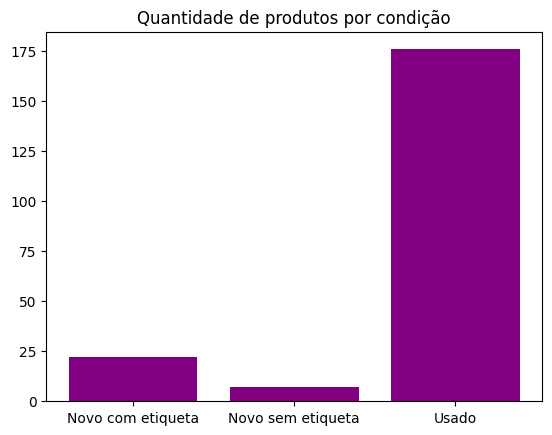

In [12]:
plt.bar(df_produtos['Condicao'], df_produtos['Quantidade'], color='purple')
plt.title('Quantidade de produtos por condição')
plt.show()

In [13]:
consulta('SELECT * FROM produtos').head()

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado


In [14]:
consulta('SELECT * FROM itens_pedidos').head()

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0


In [15]:
df_produtos_quantidade = consulta('''SELECT itens_pedidos.produto_id, produtos.produto, SUM(itens_pedidos.quantidade) AS quantidade_vendida
         FROM ITENS_PEDIDOS, PRODUTOS
         WHERE produtos.produto_id = itens_pedidos.produto_id
         GROUP BY itens_pedidos.produto_id
         ORDER BY quantidade_vendida ASC
         ''')
df_produtos_quantidade

,produto_id,produto,quantidade_vendida
0,72667,Saia Pregas Preta,317
1,47682,Vestido Malha Estampa,318
2,84743,Blusa Listrada Malha,322
3,88368,Blusa Malha Azul,325
4,18790,Vestido Recortes Cores,333
...,...,...,...
200,53941,Cropped Escritas Pb,508
201,33976,Camisa Xadrez Azul,511
202,47405,Blusa Manga Estampa,536
203,13814,Vestido Nude Reta,547


<BarContainer object of 10 artists>

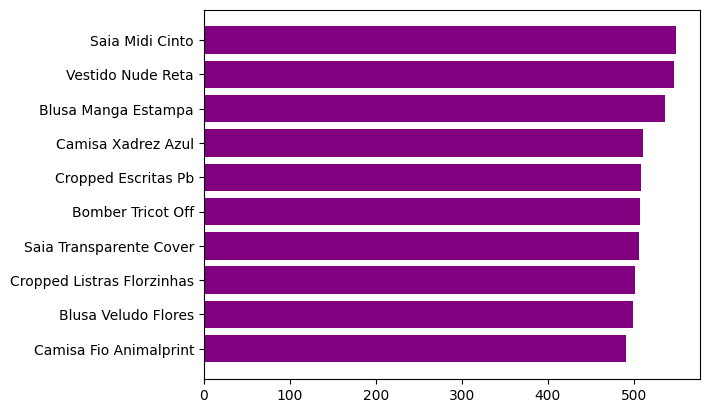

In [16]:
plt.barh(df_produtos_quantidade['produto'][-10:], df_produtos_quantidade['quantidade_vendida'][-10:], color='purple')

## Desafio 2

In [17]:
itens_pedidos

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0
...,...,...,...,...,...,...,...,...
24522,25051,64127,63716,4,590,2360,BR-PE,472.0
24523,25052,37384,63999,4,700,2800,BR-RO,560.0
24524,25053,100932,64594,5,3900,19500,BR-RO,3900.0
24525,25054,3820,64811,3,139,417,BR-MA,83.4


In [18]:
consulta('''SELECT ITENS_PEDIDOS.PRODUTO_ID, PRODUTOS.PRODUTO, SUM(ITENS_PEDIDOS.QUANTIDADE * PRODUTOS.PRECO) AS VALOR_TOTAL FROM ITENS_PEDIDOS, PRODUTOS WHERE PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID GROUP BY ITENS_PEDIDOS.PRODUTO_ID ORDER BY VALOR_TOTAL DESC''')

,produto_id,produto,VALOR_TOTAL
0,3865,Bolsa Classica Roxa,2860000
1,4307,Bolsa Intrecciato Caramelo,2216825
2,100932,Sapato Cetim Pink,1821300
3,89100,Vestido Longo Preto,1814400
4,17990,Saia Couro Tijolo,1751800
...,...,...,...
200,73692,Shorts Estampa Floral,35640
201,75706,Shorts Poa Pb,35600
202,38723,Top Cropped Coqueiros,31440
203,86544,Macaquinho Tricot Bege,20650


In [19]:
consulta('''SELECT SUM(ITENS_PEDIDOS.VALOR_TOTAL) AS FATURAMENTO_TOTAL FROM ITENS_PEDIDOS''')

,FATURAMENTO_TOTAL
0,45803930


In [20]:
df_produtos_mais_vendidos = consulta('''SELECT ITENS_PEDIDOS.PRODUTO_ID, PRODUTOS.PRODUTO, SUM(ITENS_PEDIDOS.QUANTIDADE) AS quantidade_vendida FROM ITENS_PEDIDOS, PRODUTOS WHERE PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID GROUP BY ITENS_PEDIDOS.PRODUTO_ID ORDER BY QUANTIDADE_VENDIDA ASC''')

In [21]:
df_produtos_mais_vendidos

,produto_id,produto,quantidade_vendida
0,72667,Saia Pregas Preta,317
1,47682,Vestido Malha Estampa,318
2,84743,Blusa Listrada Malha,322
3,88368,Blusa Malha Azul,325
4,18790,Vestido Recortes Cores,333
...,...,...,...
200,53941,Cropped Escritas Pb,508
201,33976,Camisa Xadrez Azul,511
202,47405,Blusa Manga Estampa,536
203,13814,Vestido Nude Reta,547


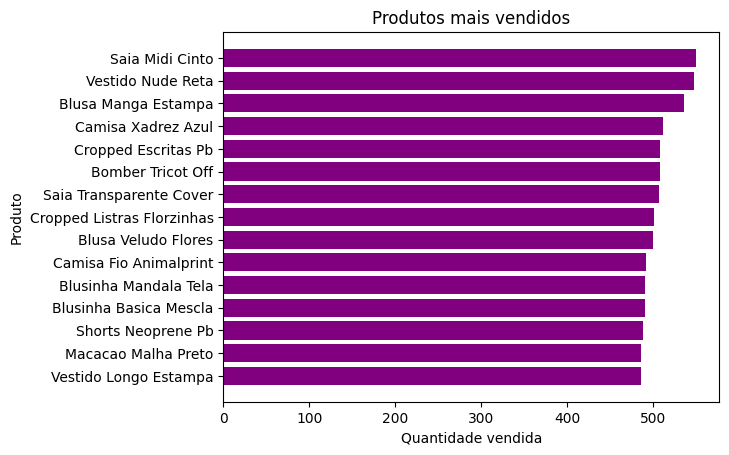

In [22]:
plt.barh(df_produtos_mais_vendidos['produto'][-15:], df_produtos_mais_vendidos['quantidade_vendida'][-15:], color='purple')
plt.xlabel('Quantidade vendida')
plt.ylabel('Produto')
plt.title('Produtos mais vendidos')
plt.show()

# Lidando com filtros

In [23]:
consulta('''SELECT * FROM PEDIDOS''')

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575
...,...,...,...,...,...
24522,63716,64127,1,2021-03-09,2360
24523,63999,37384,2,2021-03-09,2800
24524,64594,100932,1,2021-03-10,19500
24525,64811,3820,3,2021-03-10,417


In [24]:
consulta('''SELECT * FROM PEDIDOS WHERE strftime('%Y', data_compra) = '2020' ''')

,pedido_id,produto_id,vendedor_id,data_compra,total
0,112772,84743,3,2020-01-01,720
1,112909,56350,3,2020-01-01,1225
2,113068,70673,2,2020-01-01,1050
3,113453,16634,3,2020-01-01,2880
4,114487,43054,1,2020-01-01,640
...,...,...,...,...,...
14540,26762,9981,4,2020-12-31,8000
14541,27016,20029,3,2020-12-31,1764
14542,27666,12895,5,2020-12-31,10400
14543,28206,29893,4,2020-12-31,2100


In [25]:
consulta('''SELECT VENDEDOR_ID, COUNT(*) AS Vendas FROM PEDIDOS WHERE strftime('%Y', data_compra)= '2020' GROUP BY VENDEDOR_ID''')

,vendedor_id,Vendas
0,1,3427
1,2,3338
2,3,2782
3,4,2510
4,5,2488


In [26]:
consulta('''SELECT * FROM VENDEDORES''')

,vendedor_id,nome_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca


In [27]:
consulta('''SELECT VENDEDORES.NOME_VENDEDOR, COUNT(*) AS Vendas FROM PEDIDOS, VENDEDORES WHERE strftime('%Y', data_compra) = '2020' AND VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID GROUP BY PEDIDOS.VENDEDOR_ID''')

,nome_vendedor,Vendas
0,Ana Duarte,3427
1,Daniel Siqueira,3338
2,Nadia Oliveira,2782
3,Millena Pereira,2510
4,Paulo Calanca,2488


In [28]:
consulta('''SELECT VENDEDORES.NOME_VENDEDOR, AVG(PEDIDOS.TOTAL) AS 'Media de vendas totais' FROM PEDIDOS, VENDEDORES WHERE strftime('%Y', data_compra) = '2020' AND VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID GROUP BY PEDIDOS.VENDEDOR_ID ORDER BY AVG(PEDIDOS.TOTAL) DESC''')

,nome_vendedor,Media de vendas totais
0,Daniel Siqueira,1972.338526
1,Millena Pereira,1894.614343
2,Ana Duarte,1843.452582
3,Nadia Oliveira,1818.342200
4,Paulo Calanca,1813.469855


## Desafio 3

In [29]:
consulta('''SELECT * FROM PEDIDOS''')

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575
...,...,...,...,...,...
24522,63716,64127,1,2021-03-09,2360
24523,63999,37384,2,2021-03-09,2800
24524,64594,100932,1,2021-03-10,19500
24525,64811,3820,3,2021-03-10,417


In [30]:
df_vendas_2019 = consulta('''SELECT PEDIDOS.PRODUTO_ID, PRODUTOS.PRODUTO, COUNT(*) AS 'Quantidades de vendas 2019' FROM PEDIDOS, PRODUTOS WHERE strftime('%Y', data_compra) = '2019' AND PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID GROUP BY PEDIDOS.PRODUTO_ID ORDER BY COUNT(*) ASC''')
df_vendas_2019

,produto_id,produto,Quantidades de vendas 2019
0,88368,Blusa Malha Azul,23
1,4307,Bolsa Intrecciato Caramelo,26
2,21429,Casaco Preto Botoes,26
3,84692,Tenis Tecido Purple,26
4,29650,Vestido Estampa Pb,28
...,...,...,...
200,77079,Saia Evase Cinza,53
201,47405,Blusa Manga Estampa,54
202,66539,Shorts Bordado Branco,55
203,100481,Bomber Tricot Off,56


In [31]:
df_vendas_2021 = consulta('''SELECT strftime('%m', PEDIDOS.DATA_COMPRA) AS Mes, SUM(PEDIDOS.TOTAL) AS Receita FROM PEDIDOS, PRODUTOS WHERE strftime('%Y', data_compra) = '2021' AND PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID GROUP BY Mes ''')
df_vendas_2021

,Mes,Receita
0,01,2097109
1,02,1140729
2,03,51525


<BarContainer object of 3 artists>

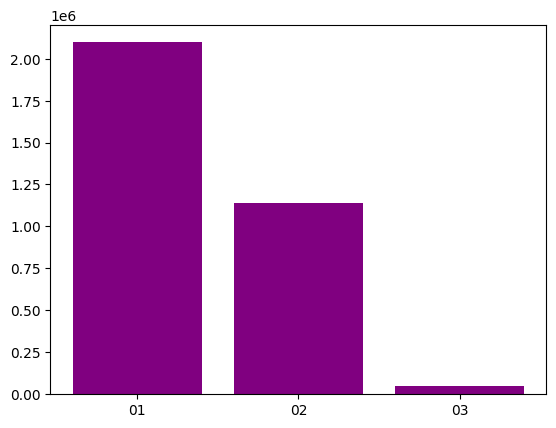

In [32]:
plt.bar(df_vendas_2021['Mes'], df_vendas_2021['Receita'], color='purple')

# Avançando nas relações

In [33]:
consulta('''SELECT * FROM ITENS_PEDIDOS''')

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0
...,...,...,...,...,...,...,...,...
24522,25051,64127,63716,4,590,2360,BR-PE,472.0
24523,25052,37384,63999,4,700,2800,BR-RO,560.0
24524,25053,100932,64594,5,3900,19500,BR-RO,3900.0
24525,25054,3820,64811,3,139,417,BR-MA,83.4


In [34]:
consulta('''SELECT ITENS_PEDIDOS.ESTADO, COUNT(*) AS Vendas FROM ITENS_PEDIDOS GROUP BY ITENS_PEDIDOS.ESTADO ORDER BY COUNT(*) DESC''')

,Estado,Vendas
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RR,925
8,BR-RO,925
9,BR-RN,921


In [35]:
consulta('''SELECT * FROM PEDIDOS''')

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575
...,...,...,...,...,...
24522,63716,64127,1,2021-03-09,2360
24523,63999,37384,2,2021-03-09,2800
24524,64594,100932,1,2021-03-10,19500
24525,64811,3820,3,2021-03-10,417


In [49]:
consulta('''SELECT PEDIDOS.VENDEDOR_ID, COUNT(*) AS Vendas FROM PEDIDOS JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP' GROUP BY PEDIDOS.VENDEDOR_ID ORDER BY COUNT(*) DESC''')

,vendedor_id,Vendas
0,2,190
1,5,182
2,3,181
3,1,180
4,4,157


In [50]:
consulta('''SELECT * FROM VENDEDORES''')

,vendedor_id,nome_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca


In [53]:
consulta('''SELECT * FROM PEDIDOS''')

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575
...,...,...,...,...,...
24522,63716,64127,1,2021-03-09,2360
24523,63999,37384,2,2021-03-09,2800
24524,64594,100932,1,2021-03-10,19500
24525,64811,3820,3,2021-03-10,417


In [60]:
consulta('''SELECT VENDEDORES.NOME_VENDEDOR, COUNT(*) AS Vendas 
FROM PEDIDOS 
JOIN VENDEDORES ON VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PEDIDOS.VENDEDOR_ID
ORDER BY COUNT(*) DESC
''')

OperationalError: (sqlite3.OperationalError) no such column: ITENS_PEDIDOS.ESTADO
[SQL: SELECT VENDEDORES.NOME_VENDEDOR, COUNT(*) AS Vendas 
FROM PEDIDOS 
JOIN VENDEDORES ON VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PEDIDOS.VENDEDOR_ID
ORDER BY COUNT(*) DESC
]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

## Desafio 4

In [56]:
consulta('''SELECT * FROM PEDIDOS''')

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575
...,...,...,...,...,...
24522,63716,64127,1,2021-03-09,2360
24523,63999,37384,2,2021-03-09,2800
24524,64594,100932,1,2021-03-10,19500
24525,64811,3820,3,2021-03-10,417


In [57]:
consulta('''SELECT * FROM ITENS_PEDIDOS''')

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0
...,...,...,...,...,...,...,...,...
24522,25051,64127,63716,4,590,2360,BR-PE,472.0
24523,25052,37384,63999,4,700,2800,BR-RO,560.0
24524,25053,100932,64594,5,3900,19500,BR-RO,3900.0
24525,25054,3820,64811,3,139,417,BR-MA,83.4


In [58]:
consulta('''SELECT * FROM PRODUTOS''')

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado
...,...,...,...,...,...,...
200,14074,Camisa Amarela Laco,450,Carol Bassi,309858,Usado
201,33349,Vestido Listras Malha,270,Calvin Klein,307118,Usado
202,22568,Casaqueto Estampa Geometrica,245,Zara,244931,Usado
203,40508,Regata Bicolor Alcinha,245,Express,247166,Usado


In [66]:
consulta('''SELECT PRODUTOS.MARCA, COUNT(*) AS Vendas_por_Marca 
FROM PRODUTOS 
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PRODUTOS.MARCA
ORDER BY COUNT(*) DESC''')

,marca,Vendas_por_Marca
0,Zara,100
1,Mixed,58
2,Animale,44
3,Le Lis Blanc,26
4,Banana Republic,18
...,...,...
111,Topshop,1
112,Morena Rosa,1
113,Erre Erre,1
114,Bobô,1


In [73]:
consulta('''SELECT PRODUTOS.PRODUTO, COUNT(*) AS Vendas_por_Produto
FROM PEDIDOS 
JOIN PRODUTOS ON PRODUTOS.PRODUTO_ID = PEDIDOS.PRODUTO_ID 
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID 
WHERE strftime('%m', PEDIDOS.DATA_COMPRA) = '12'
GROUP BY PRODUTOS.PRODUTO
ORDER BY COUNT(*) DESC''')

,produto,Vendas_por_Produto
0,Vestido Recortes Cores,30
1,Vestido Preto Franzido,26
2,Calca Jeans Costuras,26
3,Calca Alfaiataria Preta,26
4,Camisa Xadrez Azul,25
...,...,...
196,Sneaker Monograma Bege,6
197,Casaqueto Estampa Geometrica,6
198,Regata Renda Branca,5
199,Body Estampa Coracoes,5
